# Imports

In [1]:
from torch.utils.data import DataLoader, random_split
import torch
from data import PermutationDataset
from model import PermutationModel
from train import train_one_epoch, evaluate_model
import matplotlib.pyplot as plt

# Parameters
This includes parameters for what to train on and predict, and also the hyperparameters for training.

In [2]:
n = 7
label_name = "stat5"
epochs = 1000
train_split, test_split = 0.8, 0.2
learning_rate = 0.001
momentum = 0.9
batch_size = 64

# Initialization
Initialize the data loaders, model, loss function, optimizers.

In [3]:

layers = [88, 44, 22]
full_dataset = PermutationDataset(n, label_name)
training_dataset, test_dataset = random_split(full_dataset, [train_split, test_split])
model = PermutationModel(n, layers)
loss_fn = torch.nn.CrossEntropyLoss(full_dataset.class_weights())
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=momentum)
training_loader = DataLoader(training_dataset, batch_size=batch_size, shuffle=True)
losses = []

# Training loop
Train the model for the appropriate number of epochs and then save the model in `models`.

In [4]:
import os

directory = "models"
if not os.path.exists(directory):
    os.makedirs(directory)


for epoch in range(epochs):
    model.train(True)
    current_loss = train_one_epoch(training_loader, model, loss_fn, optimizer)
    print(f"Epoch {epoch}, Loss {current_loss}")
    losses.append(current_loss)

torch.save(model.state_dict(), f"models/{label_name}_{n}.pt")


Epoch 0, Loss 194.9681272506714
Epoch 1, Loss 194.71655893325806
Epoch 2, Loss 194.30191707611084
Epoch 3, Loss 193.9422152042389
Epoch 4, Loss 193.681001663208
Epoch 5, Loss 193.4140067100525
Epoch 6, Loss 193.20817065238953
Epoch 7, Loss 192.93696761131287
Epoch 8, Loss 192.63877987861633
Epoch 9, Loss 192.33780789375305
Epoch 10, Loss 192.0287308692932
Epoch 11, Loss 191.72575855255127
Epoch 12, Loss 191.2948226928711
Epoch 13, Loss 191.0331997871399
Epoch 14, Loss 190.73798084259033
Epoch 15, Loss 190.2864203453064
Epoch 16, Loss 189.90270829200745
Epoch 17, Loss 189.38076281547546
Epoch 18, Loss 188.83758759498596
Epoch 19, Loss 188.31447649002075
Epoch 20, Loss 187.62916898727417
Epoch 21, Loss 186.96190524101257
Epoch 22, Loss 186.1163294315338
Epoch 23, Loss 185.01660585403442
Epoch 24, Loss 184.0414261817932
Epoch 25, Loss 182.5747299194336
Epoch 26, Loss 180.8912410736084
Epoch 27, Loss 179.25950860977173
Epoch 28, Loss 177.15796995162964
Epoch 29, Loss 174.8937315940857
Epoc

# Print the loss curve
Visualize the loss curve to ensure that the model is learning correctly. Save the loss curve in `figures/` so that you can refer to them later.

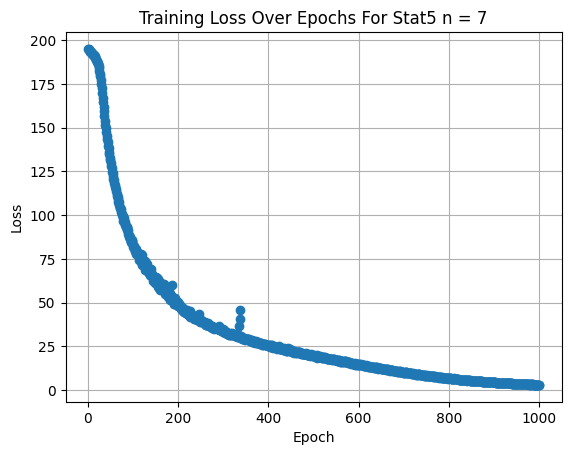

In [5]:
# Plot the training losses
plt.figure()
plt.plot(range(1, epochs + 1), losses, marker='o')
plt.title('Training Loss Over Epochs For Stat5 n = 7')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)

# Ensure the "figures" directory exists
figures_directory = "figures"
if not os.path.exists(figures_directory):
    os.makedirs(figures_directory)

# Save the plot
plt.savefig(os.path.join(figures_directory, 'training_loss_curve_stat5.png'))
plt.show()
plt.close()  # Explicitly close the plot to ensure it is written to the file




# Evaluate the model
Compute the confusion matrix on the train and test dataset and print out the accuracy and plot the confusion matrix.

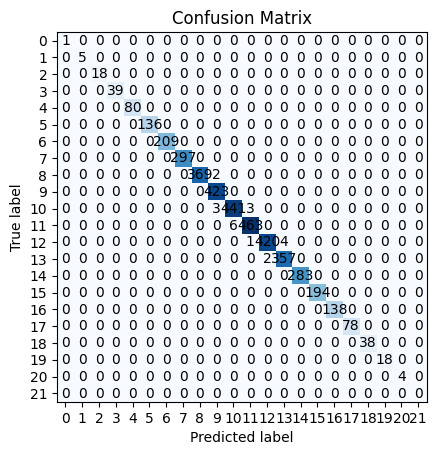

Accuracy for class 0 = 100.0%
Accuracy for class 1 = 100.0%
Accuracy for class 2 = 100.0%
Accuracy for class 3 = 100.0%
Accuracy for class 4 = 100.0%
Accuracy for class 5 = 100.0%
Accuracy for class 6 = 100.0%
Accuracy for class 7 = 100.0%
Accuracy for class 8 = 99.46091644204851%
Accuracy for class 9 = 100.0%
Accuracy for class 10 = 98.65771812080537%
Accuracy for class 11 = 98.72068230277185%
Accuracy for class 12 = 98.82352941176471%
Accuracy for class 13 = 99.44289693593315%
Accuracy for class 14 = 100.0%
Accuracy for class 15 = 100.0%
Accuracy for class 16 = 100.0%
Accuracy for class 17 = 100.0%
Accuracy for class 18 = 100.0%
Accuracy for class 19 = 100.0%
Accuracy for class 20 = 100.0%
Accuracy for class 21 = 0% (no instances in this class)
Overall accuracy = 99.47916666666667%


In [6]:
# TOD0
confusion_matrix = evaluate_model(model, training_dataset)
confusion_matrix.plot()
confusion_matrix.print_accuracy()

# Plot model weights and connections.
Plot the model weights and connections in order to attempt to interpret what the model is learning.

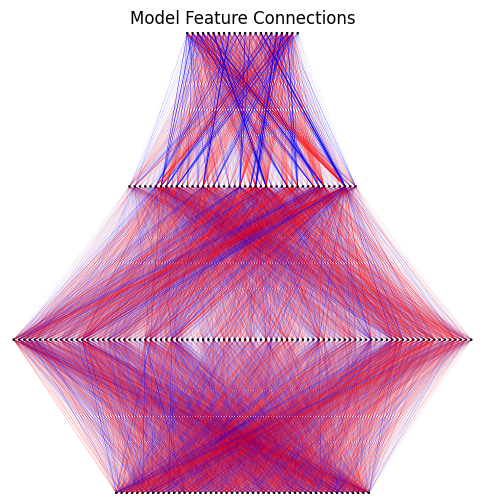

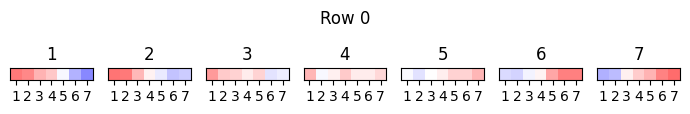

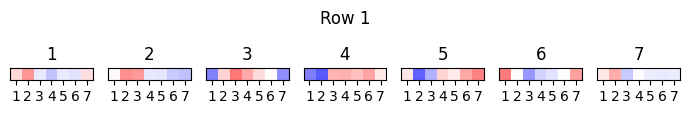

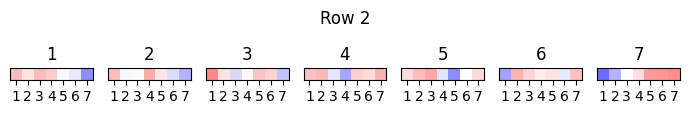

In [8]:



model.plot_connections()

model.plot_heatmap_feature(0, 0)
model.plot_heatmap_feature(0, 1)
model.plot_heatmap_feature(0, 2)



